<a href="https://colab.research.google.com/github/suyashss/nn_test/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import tensorflow.keras as keras

In [0]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

In [0]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [138]:
print(x_train.shape)

(60000, 28, 28)


In [0]:
import numpy as np
mask_train = y_train < 20
mask_test = y_test < 20
x_train = x_train[mask_train,:,:]
y_train = y_train[mask_train]
x_test = x_test[mask_test,:,:]
y_test = y_test[mask_test]

In [140]:
mask,x_train.shape,y_train.shape

(array([False,  True,  True, ..., False,  True, False]),
 (60000, 28, 28),
 (60000,))

In [0]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(x_train.shape[1:])))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(150,activation="relu"))
model.add(keras.layers.Dense(50,activation="relu"))
model.add(keras.layers.Dense(20,activation="relu"))
model.add(keras.layers.Dense(2,activation="relu"))
model.add(keras.layers.Dense(20,activation="relu"))
model.add(keras.layers.Dense(50,activation="relu"))
model.add(keras.layers.Dense(150,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(28*28,activation="relu"))
model.add(keras.layers.Reshape(x_train.shape[1:]))

In [0]:
model.compile(optimizer="rmsprop",loss="mean_squared_error",metrics=["mae"],)

In [146]:
callbacks_es=[keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5)]
history = model.fit(x_train,x_train,epochs=50,validation_split=0.1,callbacks=callbacks_es)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 10s 187us/sample - loss: 0.0612 - mae: 0.1400 - val_loss: 0.0464 - val_mae: 0.1178
Epoch 2/50
54000/54000 [==============================] - 9s 162us/sample - loss: 0.0417 - mae: 0.1117 - val_loss: 0.0404 - val_mae: 0.1122
Epoch 3/50
54000/54000 [==============================] - 9s 164us/sample - loss: 0.0366 - mae: 0.1040 - val_loss: 0.0353 - val_mae: 0.1030
Epoch 4/50
54000/54000 [==============================] - 9s 163us/sample - loss: 0.0341 - mae: 0.0998 - val_loss: 0.0342 - val_mae: 0.0994
Epoch 5/50
54000/54000 [==============================] - 9s 164us/sample - loss: 0.0333 - mae: 0.0980 - val_loss: 0.0347 - val_mae: 0.1032
Epoch 6/50
54000/54000 [==============================] - 9s 163us/sample - loss: 0.0325 - mae: 0.0966 - val_loss: 0.0318 - val_mae: 0.0964
Epoch 7/50
54000/54000 [==============================] - 9s 165us/sample - loss: 0.0318 - mae: 0.0953 - val_l

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

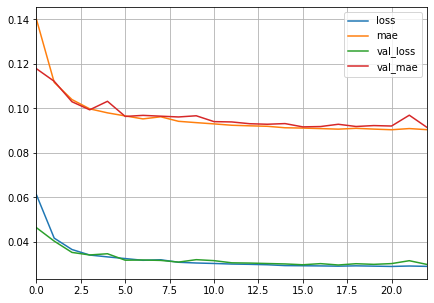

In [148]:
pd.DataFrame(history.history).plot(figsize=(7,5))
plt.grid(True)
#plt.gca().set_ylim(0,0.4)
plt.show()

In [149]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_70 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_71 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_72 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_73 (Dense)             (None, 2)                 42        
_________________________________________________________________
dense_74 (Dense)             (None, 20)               

In [150]:
for layer in model.layers:
  if layer.output_shape[1] == 2 and 'dense' in layer.name:
    layer_name = layer.name
    break
print(layer_name)    

dense_73


In [152]:
model2 = keras.Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
model2.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9_input (InputLayer) [(None, 28, 28)]          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_70 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_71 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_72 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_73 (Dense)             (None, 2)                 42  

In [0]:
test_pred = model2.predict(x_test)
df2 = pd.DataFrame({'x':test_pred[:,0],'y':test_pred[:,1],'class_idx':[class_names[x] for x in y_test]})
#cvec=['red' if x==0 else 'blue' for x in df2.class_idx.values]
#df2.plot.scatter('x','y',c='class_idx',alpha=0.1,colormap="viridis")

In [0]:
import seaborn as sns

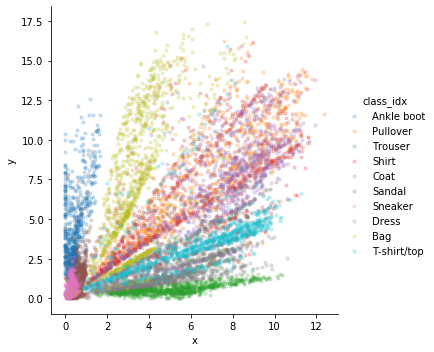

In [163]:
sns.lmplot('x','y',data=df2,hue='class_idx',scatter_kws={"s":10,'alpha':0.2},fit_reg=False)

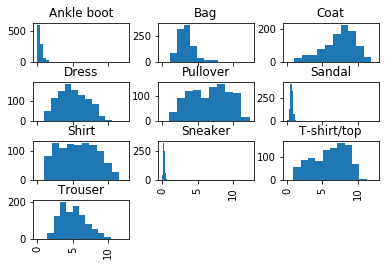

In [164]:
df2.hist('x',by='class_idx',sharex=True)
plt.show()

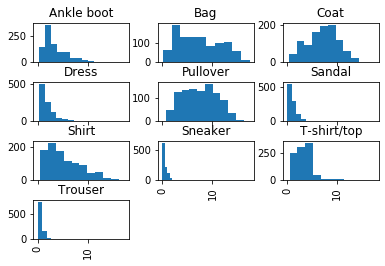

In [165]:
df2.hist('y',by='class_idx',sharex=True)
plt.show()